# 1. Data Understanding and Loading

In [16]:
# LOADING DATA
import pandas as pd

df_purchases = pd.read_csv("data/dataset.csv")
df_purchases.head()

,CustomerID,ProductID,PurchaseDate,Quantity,Price,TotalAmount
0,103,58,2023-01-01 0:00,9,139.00,1251.00
1,436,23,2023-01-01 1:00,3,302.90,908.70
2,861,54,2023-01-01 2:00,1,465.33,465.33
3,271,80,2023-01-01 3:00,2,429.06,858.12
4,107,65,2023-01-01 4:00,6,232.89,1397.34


In [17]:
#KNOW THE NUMBER OF ROWS AND COLUMNS IN THE DATAFRAME
df_purchases.shape

(10000, 6)

In [18]:
#DETERMINE THE NUMBER OF NON NULL VALUES OF EACH FEATURE AND THE DATA TYPE OF IT
df_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    10000 non-null  int64  
 1   ProductID     10000 non-null  int64  
 2   PurchaseDate  10000 non-null  object 
 3   Quantity      10000 non-null  int64  
 4   Price         10000 non-null  float64
 5   TotalAmount   10000 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [19]:
#STATISTICS FOR THE NUMERIC FEATURES OF THE DATAFRAME
df_purchases.describe()

,CustomerID,ProductID,Quantity,Price,TotalAmount
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,504.470600,50.734200,4.963900,252.576233,1254.981401
std,289.724434,28.768154,2.578616,142.067372,1027.526370
min,1.000000,1.000000,1.000000,5.020000,5.170000
25%,251.000000,26.000000,3.000000,131.145000,409.810000
50%,506.500000,51.000000,5.000000,253.420000,968.290000
75%,758.000000,76.000000,7.000000,373.882500,1895.370000
max,1000.000000,100.000000,9.000000,499.950000,4492.800000


In [20]:
#STATISTICS FOR NO NUMERIC FEATURES OF THE DATAFRAME
df_purchases.describe(include="O")

,PurchaseDate
count,10000
unique,10000
top,2023-01-01 0:00
freq,1


# 2. Data Preprocessing

In [21]:
# CONVERT THE 'PurchaseDate' COLUMN TO DATATIME  
df_purchases["PurchaseDate"] = pd.to_datetime(df_purchases["PurchaseDate"])

df_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    10000 non-null  int64         
 1   ProductID     10000 non-null  int64         
 2   PurchaseDate  10000 non-null  datetime64[ns]
 3   Quantity      10000 non-null  int64         
 4   Price         10000 non-null  float64       
 5   TotalAmount   10000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 468.9 KB


In [22]:
#EXTRACT ADDITIONAL FEATURES 
df_purchases["Year"] = df_purchases["PurchaseDate"].dt.year
df_purchases["Month"] = df_purchases["PurchaseDate"].dt.month
df_purchases["Day"] = df_purchases["PurchaseDate"].dt.day
df_purchases["Hour"] = df_purchases["PurchaseDate"].dt.hour

df_purchases.head(5)


,CustomerID,ProductID,PurchaseDate,Quantity,Price,TotalAmount,Year,Month,Day,Hour
0,103,58,2023-01-01 00:00:00,9,139.00,1251.00,2023,1,1,0
1,436,23,2023-01-01 01:00:00,3,302.90,908.70,2023,1,1,1
2,861,54,2023-01-01 02:00:00,1,465.33,465.33,2023,1,1,2
3,271,80,2023-01-01 03:00:00,2,429.06,858.12,2023,1,1,3
4,107,65,2023-01-01 04:00:00,6,232.89,1397.34,2023,1,1,4


In [23]:
df_purchases=df_purchases.drop(['PurchaseDate'], axis=1)
df_purchases.head(5)

,CustomerID,ProductID,Quantity,Price,TotalAmount,Year,Month,Day,Hour
0,103,58,9,139.00,1251.00,2023,1,1,0
1,436,23,3,302.90,908.70,2023,1,1,1
2,861,54,1,465.33,465.33,2023,1,1,2
3,271,80,2,429.06,858.12,2023,1,1,3
4,107,65,6,232.89,1397.34,2023,1,1,4


# 3. Exploratory Data Analysis (EDA)

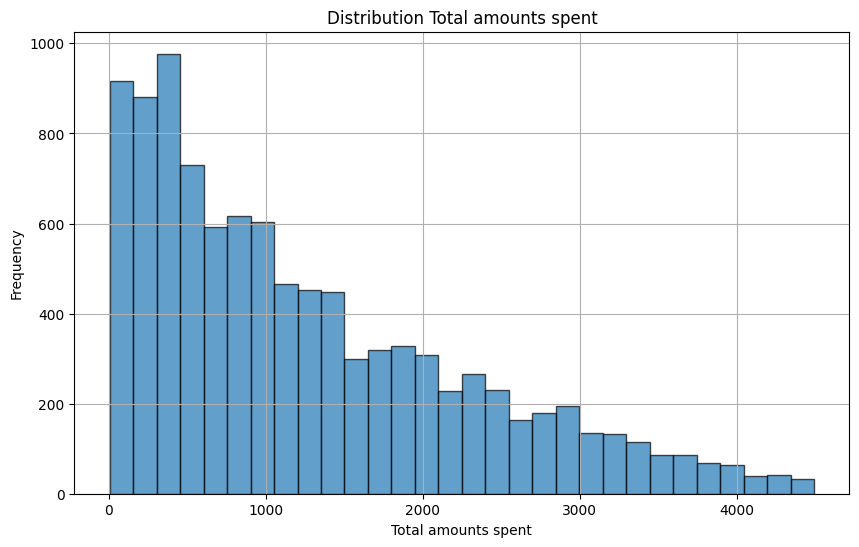

In [24]:
import matplotlib.pyplot as plt

# CREATE A HISTOGRAM  Distribution Total amounts spent
plt.figure(figsize=(10, 6))
plt.hist(df_purchases["TotalAmount"], bins=30, edgecolor='k', alpha=0.7)
plt.title("Distribution Total amounts spent")
plt.xlabel("Total amounts spent")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

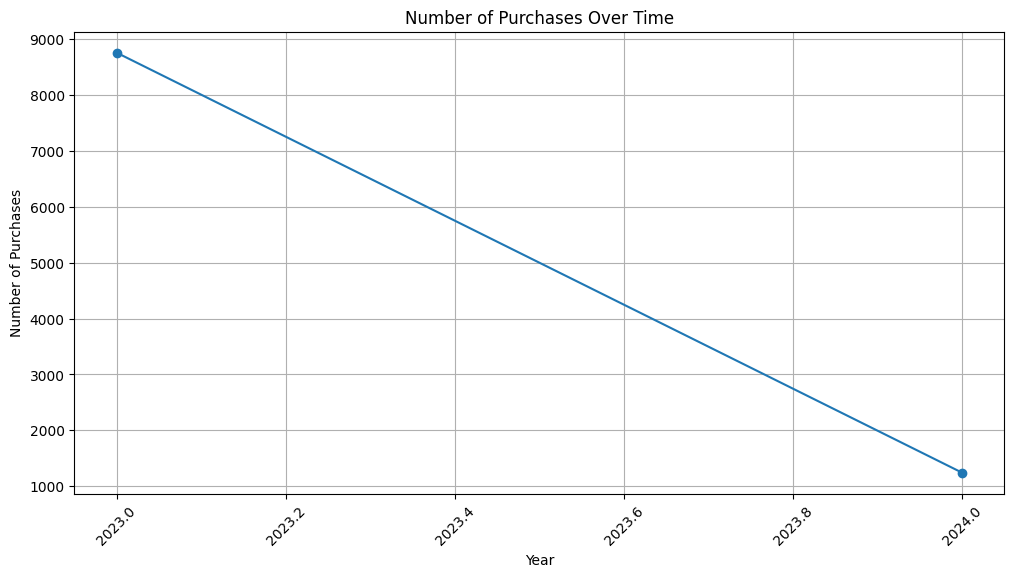

In [25]:
# ADD A COLUMN TO COUNT EACH PURCHASE 
df_purchases["PurchaseCount"] = 1

# GROUP BY YEAR
df_year_purchases = df_purchases.groupby("Year").sum()

# CREATE THE GRAPH
plt.figure(figsize=(12, 6))
plt.plot(df_year_purchases.index, df_year_purchases['PurchaseCount'], marker='o', linestyle='-')
plt.title("Number of Purchases Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Purchases")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

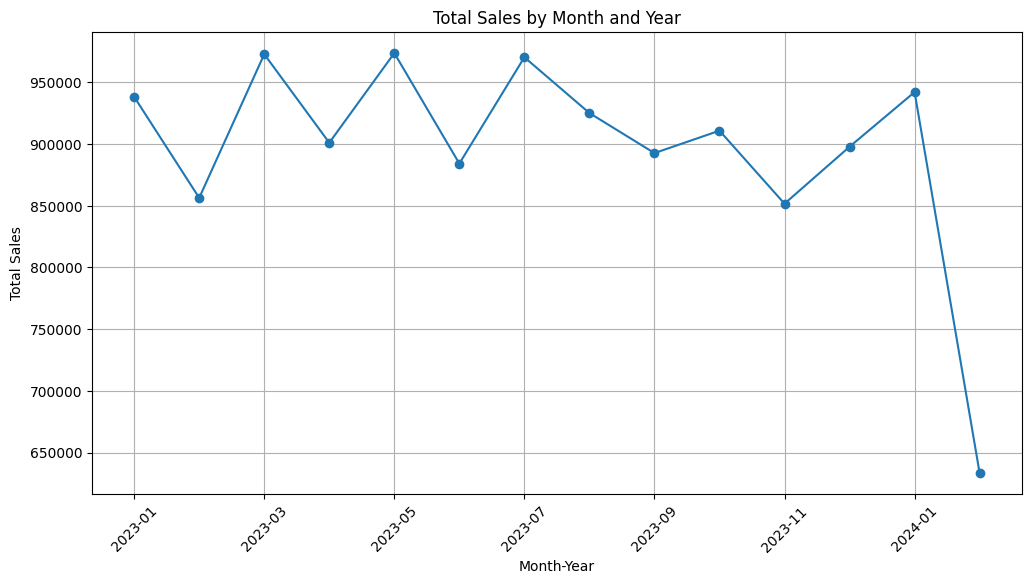

In [26]:
# Create a combined Year-Month column
df_purchases["YearMonth"] = df_purchases["Year"].astype(str) + '-' + df_purchases["Month"].astype(str).str.zfill(2)

# Group by YearMonth and sum
df_monthly_purchases = df_purchases.groupby("YearMonth").sum(numeric_only=True)

# Create graph
plt.figure(figsize=(12, 6))
df_monthly_purchases["TotalAmount"].plot(kind='line', marker='o', linestyle='-')
plt.title("Total Sales by Month and Year")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


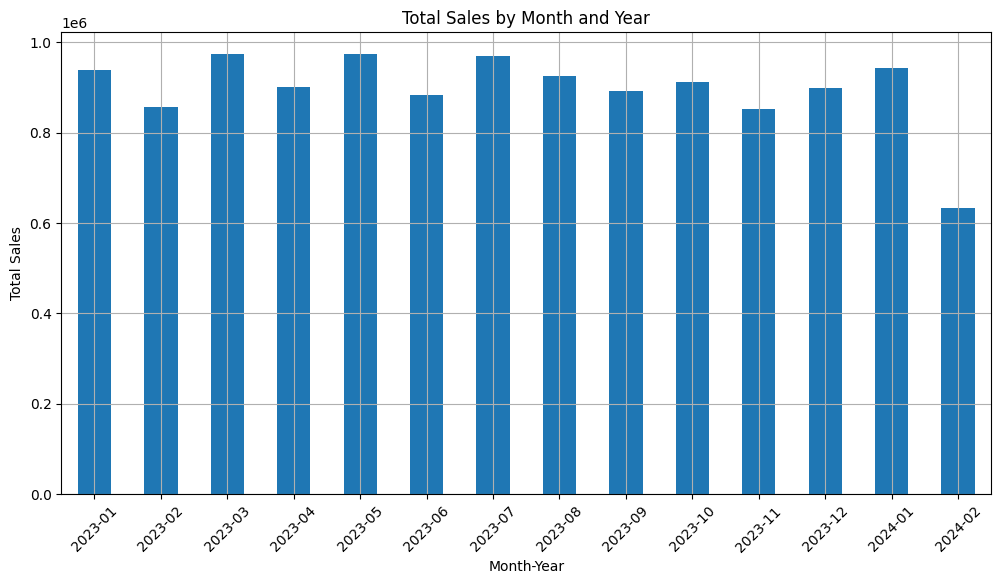

In [27]:
#Create a combined Year-Month column
df_purchases["YearMonth"] = df_purchases["Year"].astype(str) + '-' + df_purchases["Month"].astype(str).str.zfill(2)

# Group by YearMonth and sum
df_monthly_purchases = df_purchases.groupby("YearMonth").sum(numeric_only=True)

# Create bar chart
plt.figure(figsize=(12, 6))
df_monthly_purchases["TotalAmount"].plot(kind='bar')
plt.title("Total Sales by Month and Year")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


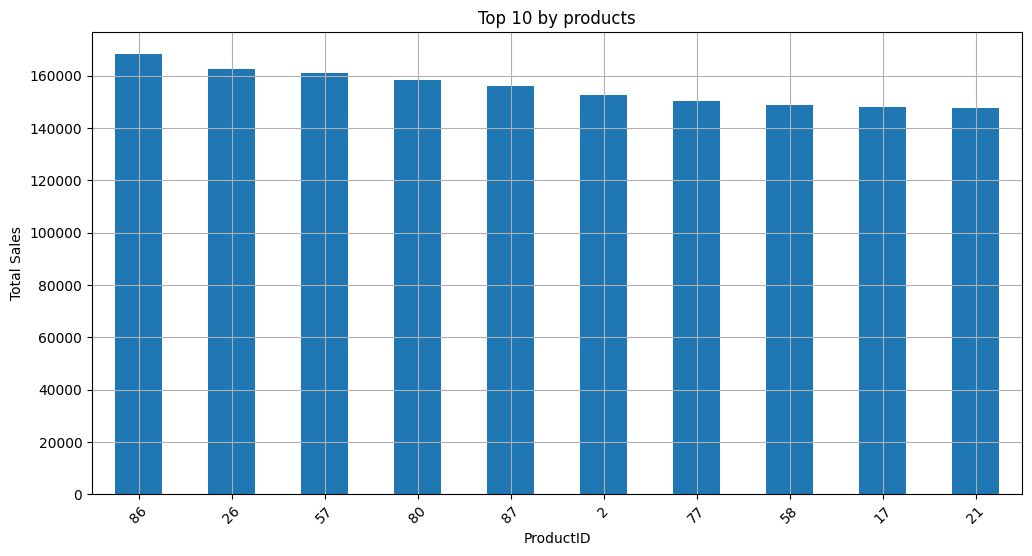

In [28]:
# Group by ProductID and sum
sales = df_purchases.groupby("ProductID")["TotalAmount"].sum()

# Sort products by total sales in descending order and select the top 10
top_10_products = sales.sort_values(ascending=False).head(10)

# Create bar chart
plt.figure(figsize=(12, 6))
top_10_products.plot(kind='bar')
plt.title("Top 10 by products" )
plt.xlabel("ProductID")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


# 4. Analysis and Insights

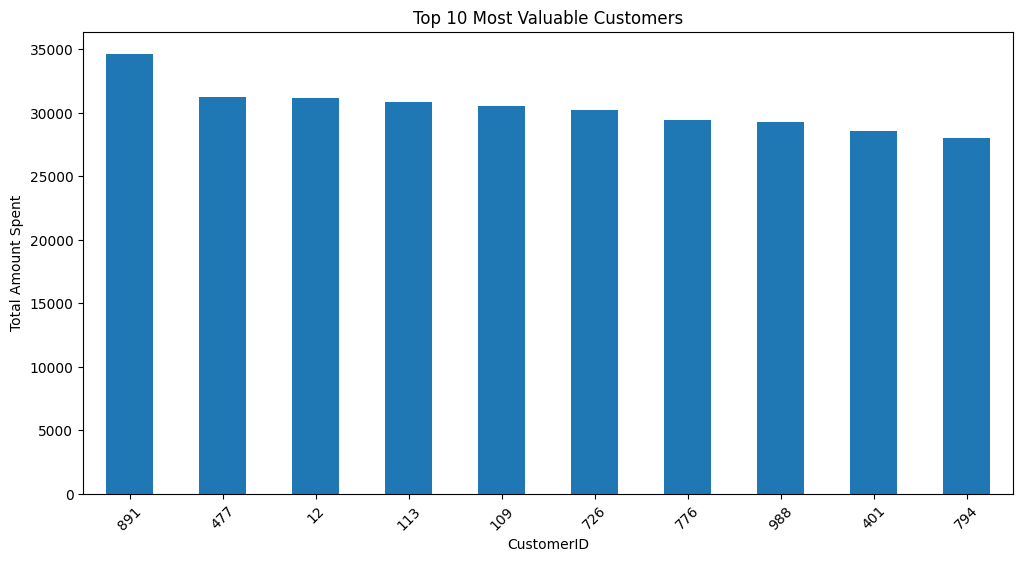

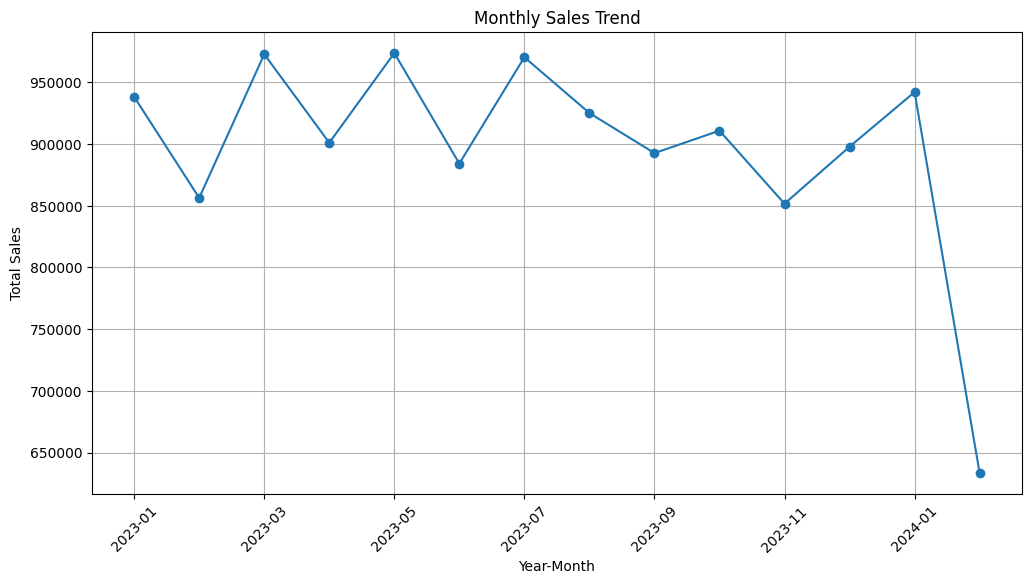

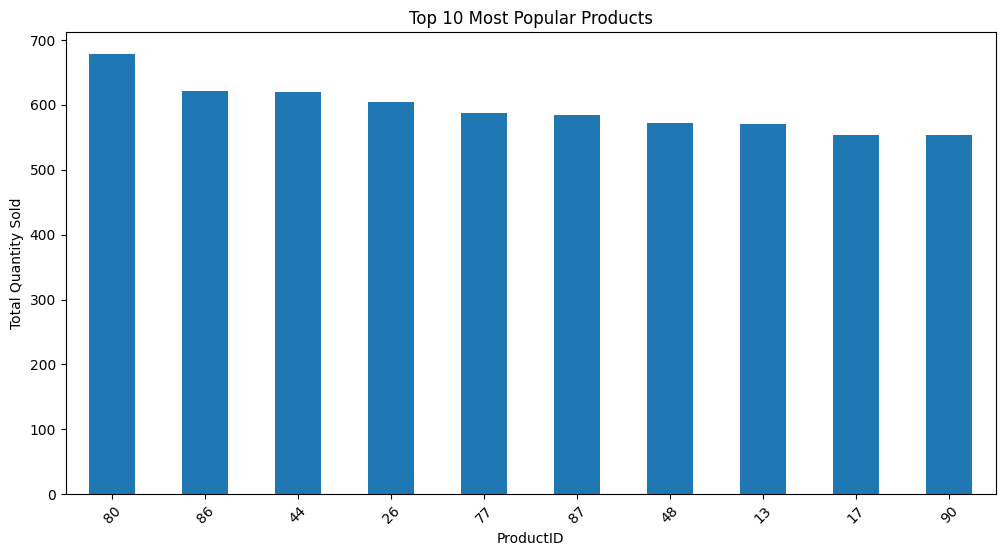

In [29]:
# Identify the most valuable customers
top_customers = df_purchases.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_customers.plot(kind='bar')
plt.title("Top 10 Most Valuable Customers")
plt.xlabel("CustomerID")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45)
plt.show()

# Analyze sales trends
monthly_sales = df_purchases.groupby('YearMonth')['TotalAmount'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Analyze product popularity
product_popularity = df_purchases.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
product_popularity.plot(kind='bar')
plt.title("Top 10 Most Popular Products")
plt.xlabel("ProductID")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

# 5. Modeling and Predictions

Mean Squared Error: 136988.6391500603
R-squared Score: 0.8719565628698003


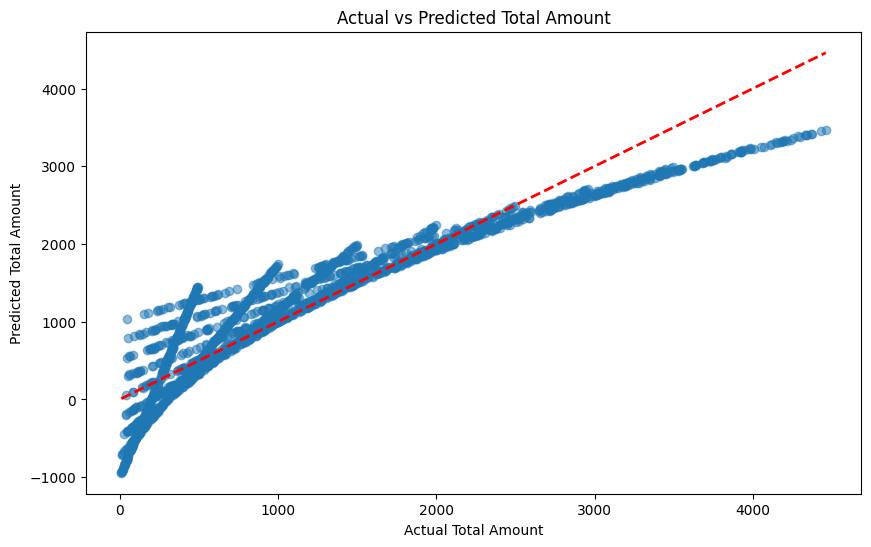

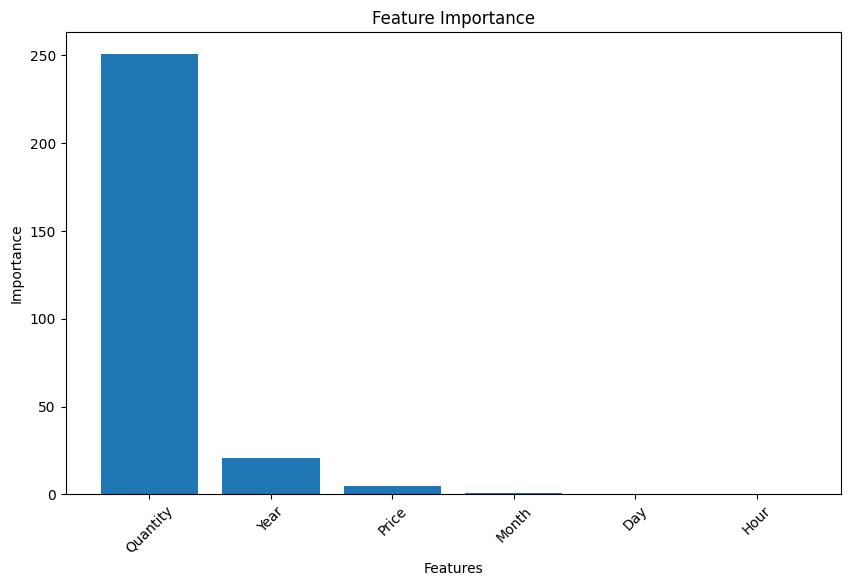

In [30]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Data preparation for modeling
X = df_purchases[['Year', 'Month', 'Day', 'Hour', 'Quantity', 'Price']]
y = df_purchases['TotalAmount']

# Splitting of the data into test-train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions over test data
y_pred = model.predict(X_test)

# Model evaluation with RMSE and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Actual vs predicted amount plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Total Amount")
plt.ylabel("Predicted Total Amount")
plt.title("Actual vs Predicted Total Amount")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()